In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('../processed_df.csv', sep=';')

In [3]:
categorical_features = pd.DataFrame(
    [c.split('__') for c in df.columns if '__' in c],
    columns=['feature', 'option']
)

display(categorical_features)

,feature,option
0,"Cuando tiene dolor de cabeza, ¿con qué frecue...",A veces
1,"Cuando tiene dolor de cabeza, ¿con qué frecue...",Muy a menudo
2,"Cuando tiene dolor de cabeza, ¿con qué frecue...",Pocas veces
3,"Cuando tiene dolor de cabeza, ¿con qué frecue...",Siempre
4,"En las últimas 4 semanas, ¿con qué frecuenci...",A veces
...,...,...
107,Indique cuál/cuáles de las siguientes afirmaci...,Tengo diagnóstico previo de alguna de las sigu...
108,Indique cuál/cuáles de las siguientes afirmaci...,Tengo diagnóstico previo de cáncer con o sin t...
109,Indique cuál/cuáles de las siguientes afirmaci...,Tengo fiebre sin una causa aparente clara (dia...
110,Indique cuál/cuáles de las siguientes afirmaci...,Tengo más de 50 años y hasta ahora nunca había...


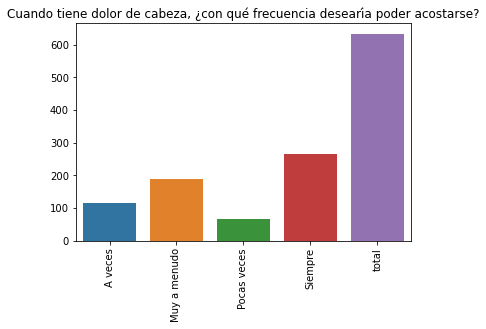

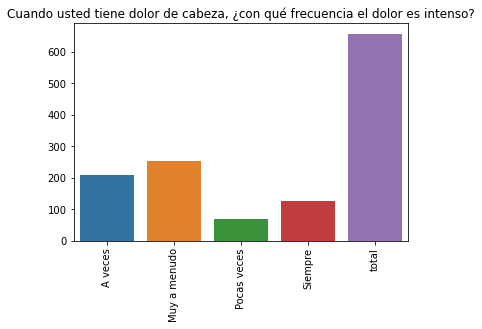

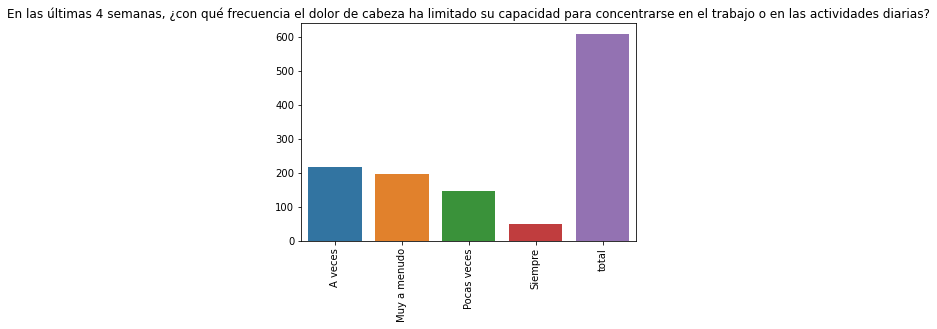

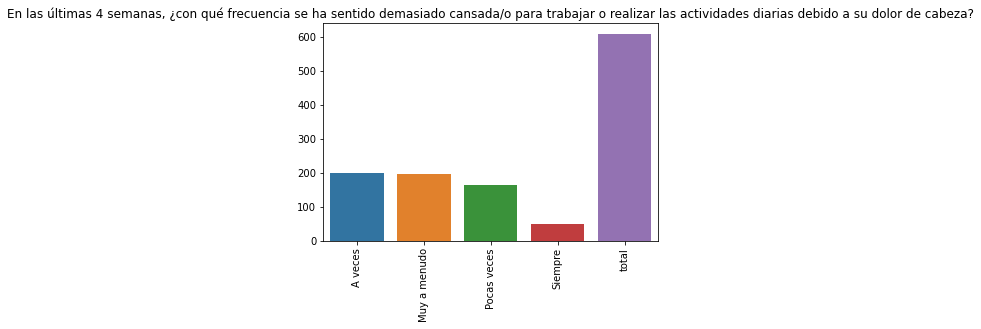

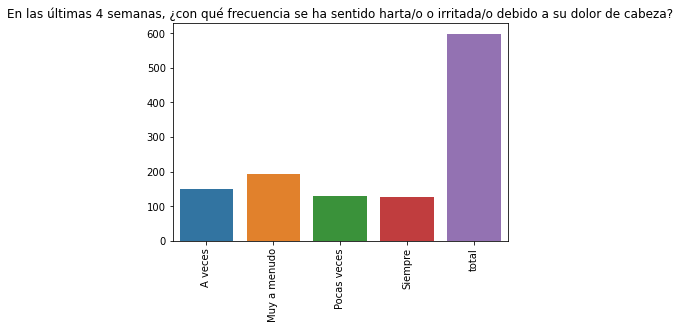

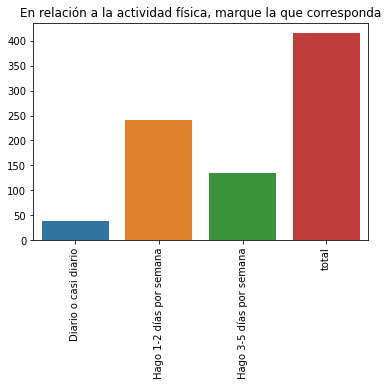

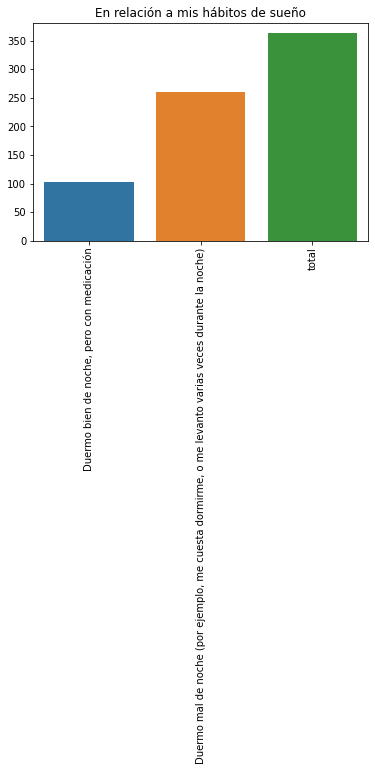

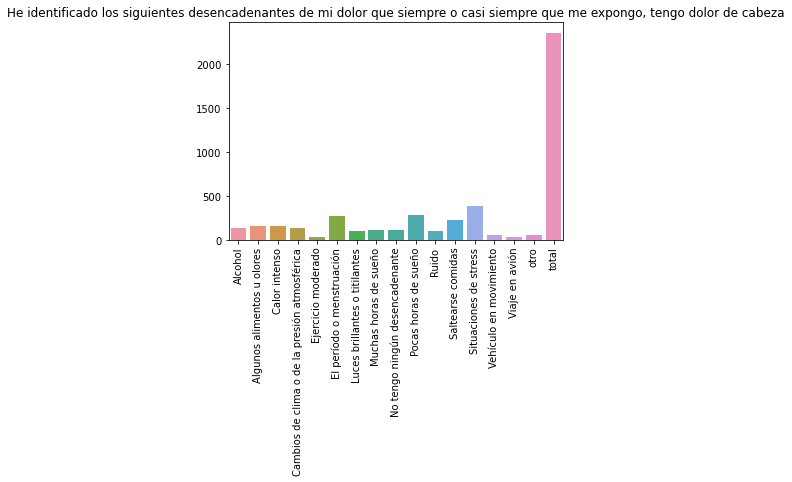

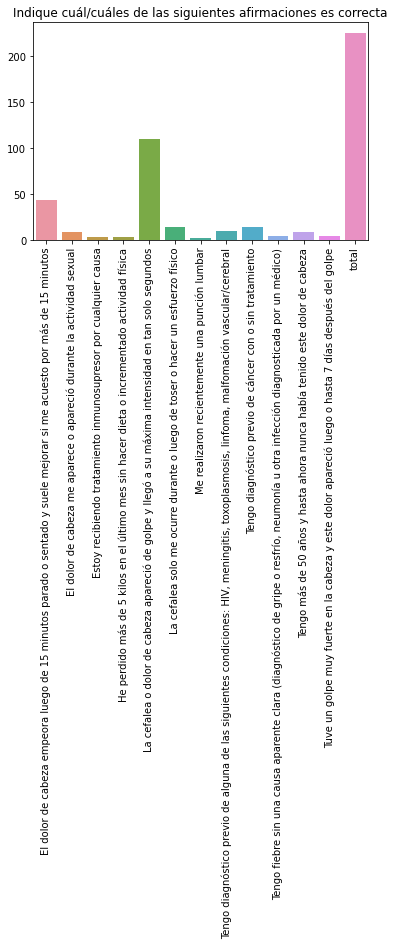

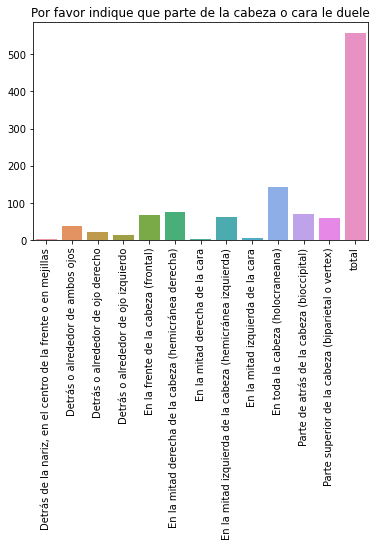

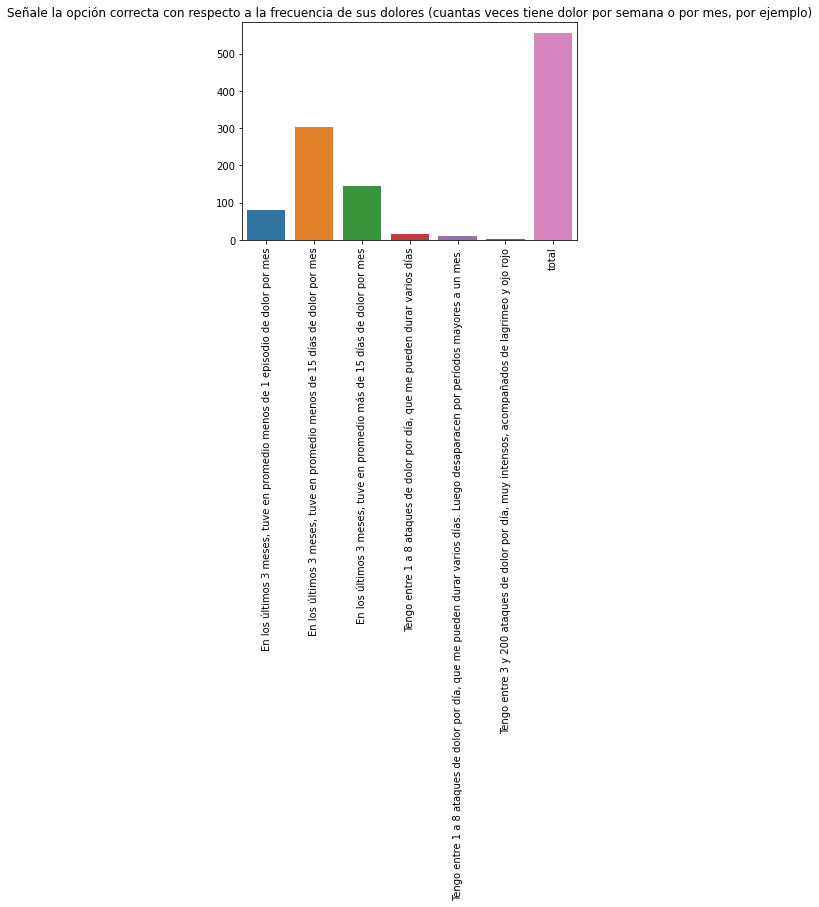

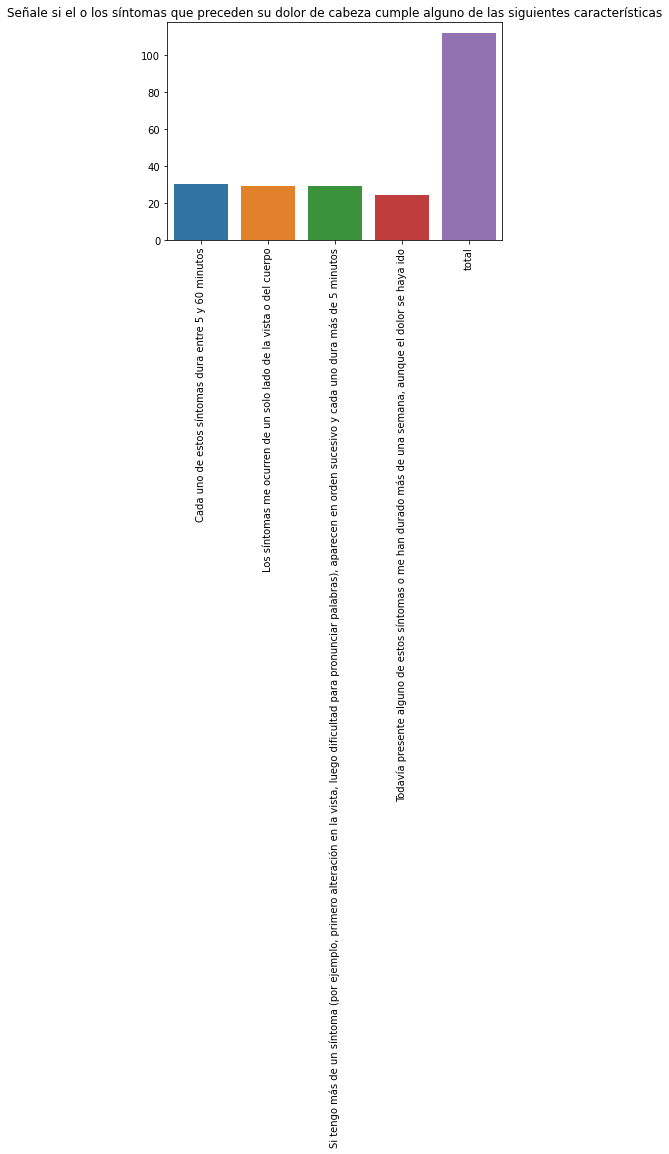

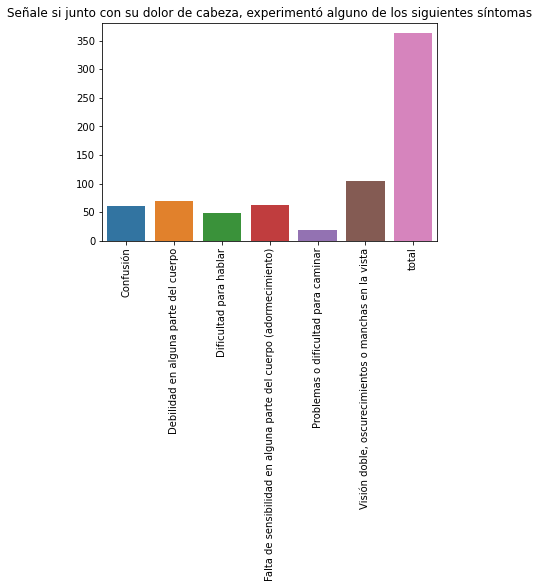

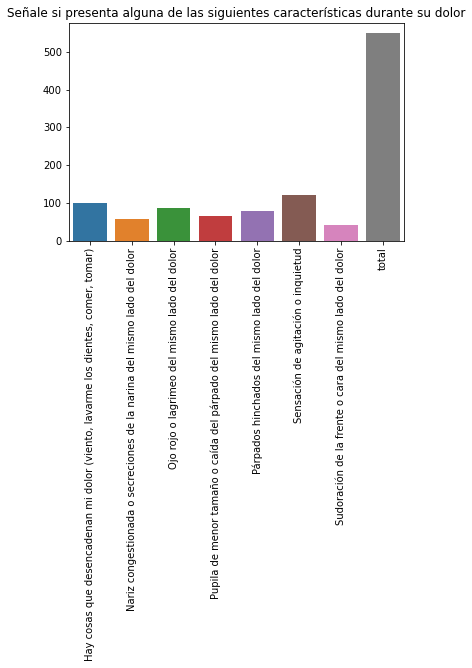

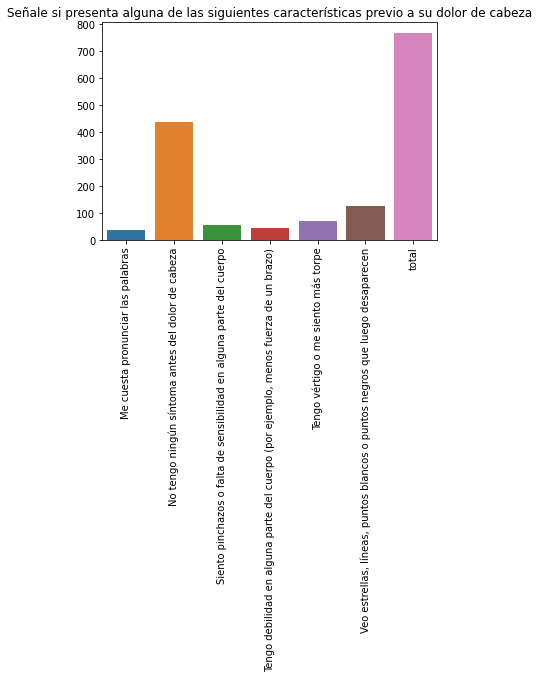

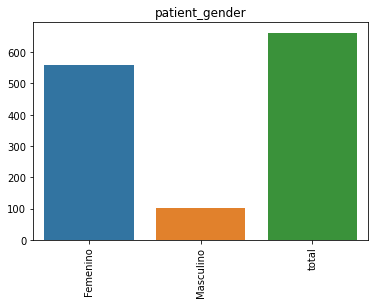

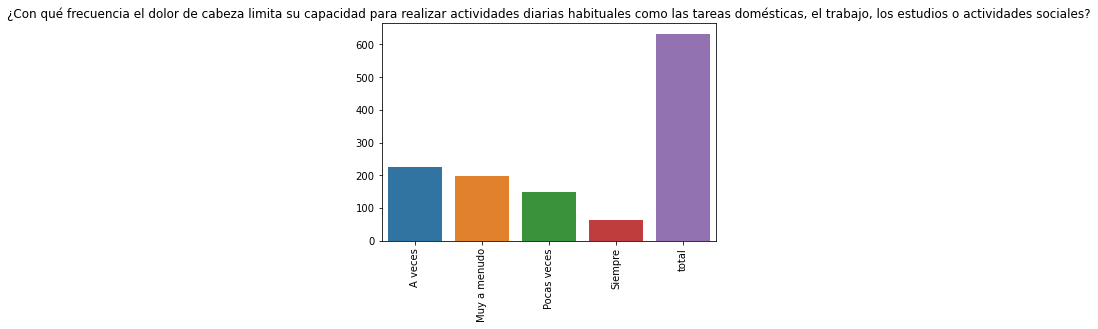

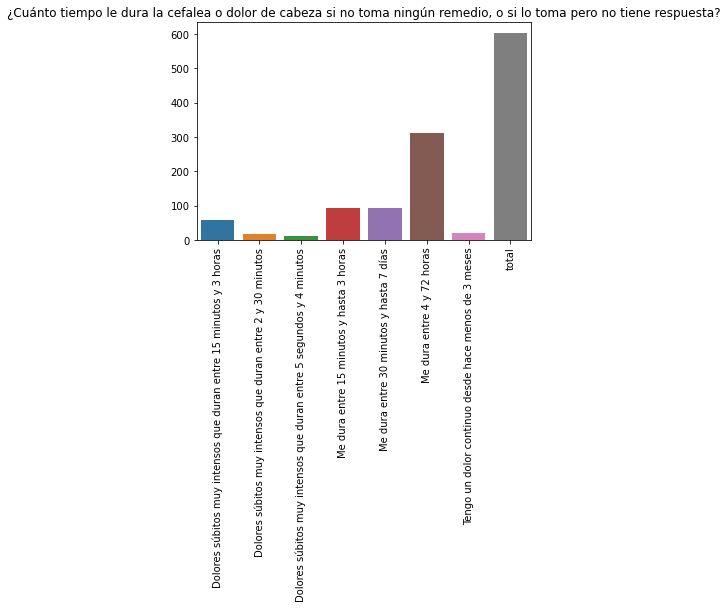

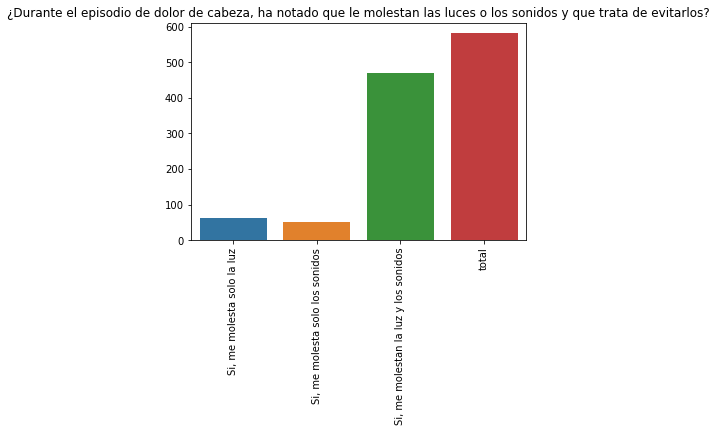

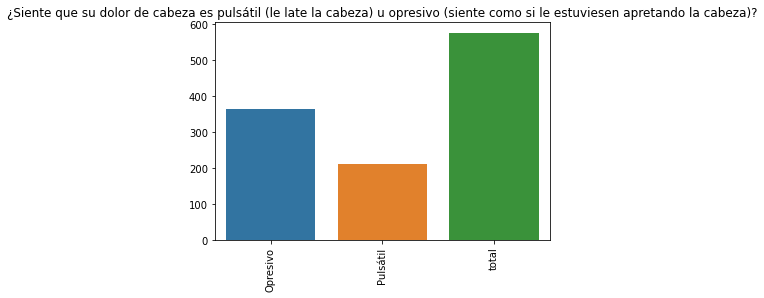

In [10]:
for feature, group in categorical_features.groupby('feature'):
    x = []
    y = []
    for option in group['option']:
        x.append(option)
        y.append(df[feature + '__' + option].sum())
    x.append('total')
    total = sum(y)
    y.append(total)

    sns.barplot(x=x, y=y)
    plt.title(feature)
    plt.xticks(rotation=90)
    plt.show()

/home/lbelloli/anaconda3/envs/entelai-predoc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


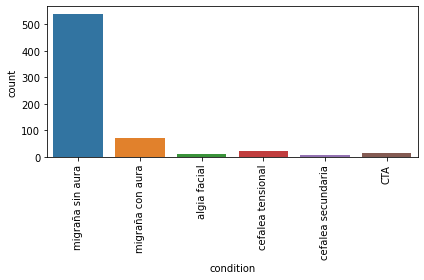

In [7]:
sns.countplot(df['condition'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('./classes_distribution.png')
plt.show()

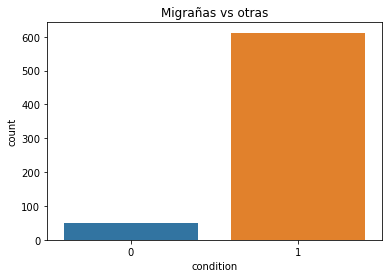

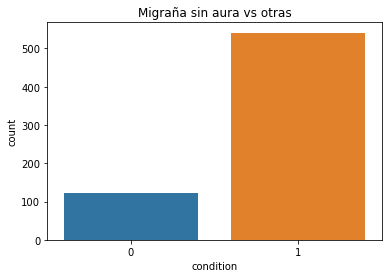

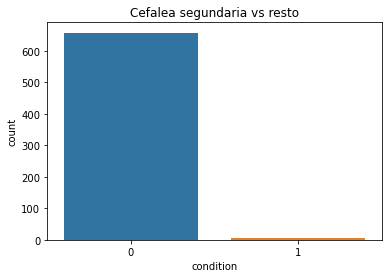

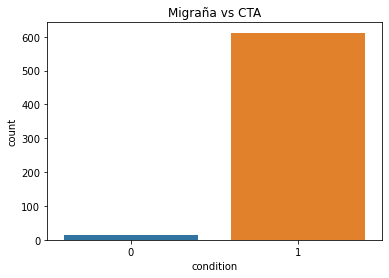

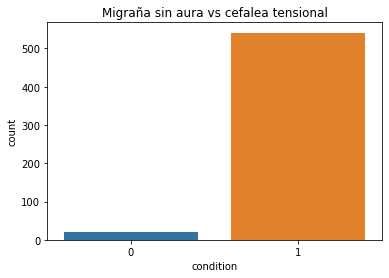

In [13]:
sns.countplot(x=df['condition'].isin(['migraña sin aura', 'migraña con aura']).astype(int))
plt.title('Migrañas vs otras')
plt.show()    

sns.countplot(x=(df['condition'] == 'migraña sin aura').astype(int))
plt.title('Migraña sin aura vs otras')
plt.show()

sns.countplot(x=(df['condition'] == 'cefalea secundaria').astype(int))
plt.title('Cefalea segundaria vs resto')
plt.show()

df_t = df[df['condition'].isin(['migraña sin aura', 'migraña con aura', 'CTA'])]
sns.countplot(x=df_t['condition'].isin(['migraña sin aura', 'migraña con aura']).astype(int))
plt.title('Migraña vs CTA')
plt.show()


df_t = df[df['condition'].isin(['migraña sin aura', 'cefalea tensional'])]
sns.countplot(x=(df_t['condition'] == 'migraña sin aura').astype(int))
plt.title('Migraña sin aura vs cefalea tensional')
plt.show()